In [1]:
from matplotlib import pyplot as plt
import os

In [2]:
def cover(peaks, peaks2):
    # peaks from 2 in 1
    peaks1 = peaks.copy()
    curr_chr = peaks1[0][0]
    idx1 = 0
    N1 = len(peaks1)
    
    def __move_chrom(idx, peak):
        while peaks1[idx][0] != peak[0] and idx + 1 < N1:
            if peaks1[idx][0].isdigit() and peak[0].isdigit() \
              and int(peaks1[idx][0]) > int(peak[0]):
                break
            if peak[0] == 'X' and peaks1[idx][0] == 'Y':
                break
            
            idx += 1
        if idx + 1 == N1:
            return -1
        else:
            return idx
        
    def __move_start(idx, thr, chrom):
        while peaks1[idx][0] == chrom and idx + 1 < N1 and peaks1[idx][1] <= thr:
            idx += 1
            
        if idx + 1 == N1:
            return -1
        else:
            return idx
        
    def __move_end(idx, thr, chrom):
        while peaks1[idx][0] == chrom and idx + 1 < N1 and peaks1[idx][2] < thr:
#             print(thr, peaks1[idx][2])
            idx += 1
        if idx + 1 == N1:
            return -1
        else:
            return idx
    
    for peak in peaks2:
#         print(peak, peaks1[idx1])
        if peak[0] == peaks1[idx1][0]:
            if peaks1[idx1][1] <= peak[1] and peaks1[idx1][2] >= peak[2]:
                peaks1[idx1][3] += 1
            
            elif peaks1[idx1][1] > peak[1]:
                if peaks1[idx1][1] <= peak[2]:
                    idx1 = __move_start(idx1, peak[2], peak[0])
                    if idx1 == -1:
                        break
                        
            else:
                if peaks1[idx1][2] < peak[1]:
                    idx1 = __move_end(idx1, peak[2], peak[0])
                    if idx1 == -1:
                        break
                    if peaks1[idx1][1] <= peak[1]:
                        peaks1[idx1][3] += 1
                    else:
                        __move_start(idx1, peak[2], peak[0])
        else:
            idx1 = __move_chrom(idx1, peak)
            if idx1 == -1:
                break
    return peaks1

In [4]:
def analyze_output(folder, file_end):
    filenames = []
    n_peaks = []
    mean_len = []
    splitted = []
    united = []
    
    for f in os.listdir(folder):
        if f.endswith(file_end):
            if not '10' in f:
                filenames.append(folder + f)
                
    filenames = sorted(filenames)
    
    def __read_peaks(fname):
        f1_peaks = []
        line_vals = []
        lens = []
        with open(fname) as f:
            for line in f:
                line_vals = line.split('\t')
                if line_vals[0][3:].isdigit() or line_vals[0][3:] in ['X', 'Y']:
                    f1_peaks.append([line_vals[0][3:], int(line_vals[1]), int(line_vals[2]), 0])
                    lens.append(int(line_vals[2]) - int(line_vals[1]))
        return f1_peaks, sum(lens) / len(lens), len(lens)
    
    f1_peaks, mean1, n1 = __read_peaks(filenames[0])
    n_peaks.append(n1)
    mean_len.append(mean1)
    
    for i in range(1, len(filenames)):
        f2_peaks, mean2, n2 = __read_peaks(filenames[i])
        mean_len.append(mean2)
        n_peaks.append(n2)
        n_spl = 0
        n_un = 0
        spl = cover(f1_peaks, f2_peaks)
        for p in spl:
            if p[3] > 1:
                n_spl += 1
        splitted.append(n_spl), 10
        un = cover(f2_peaks, f1_peaks)
        for p in un:
            if p[3] > 1:
                n_un += 1
        united.append(n_un)
        
        f1_peaks = f2_peaks.copy()
    if len(mean_len) < 10:
        for _ in range(len(mean_len), 10):
            splitted.append(0)
            united.append(0)
            n_peaks.append(0)
            mean_len.append(0)
    
    return splitted, united, n_peaks, mean_len

In [31]:
splk4me1, unk4me1, nsk4me1, meansk4me1 =  analyze_output('h3k4me1/macs2_fdr_0.05/', '.broadPeak')

In [32]:
sic_splk4me1, sic_unk4me1, sic_nsk4me1, sic_meansk4me1 =  analyze_output('h3k4me1/sicer_fdr_0.05/', 'FDR0.05.bed')

In [10]:
sic_splk4me1

[875, 43305, 40455, 36950, 32963, 28218, 22520, 15370, 6943]

In [33]:
sp_splk4me1, sp_unk4me1, sp_nsk4me1, sp_meansk4me1 =  analyze_output('h3k4me1/span_fdr_0.05/', '.peak')

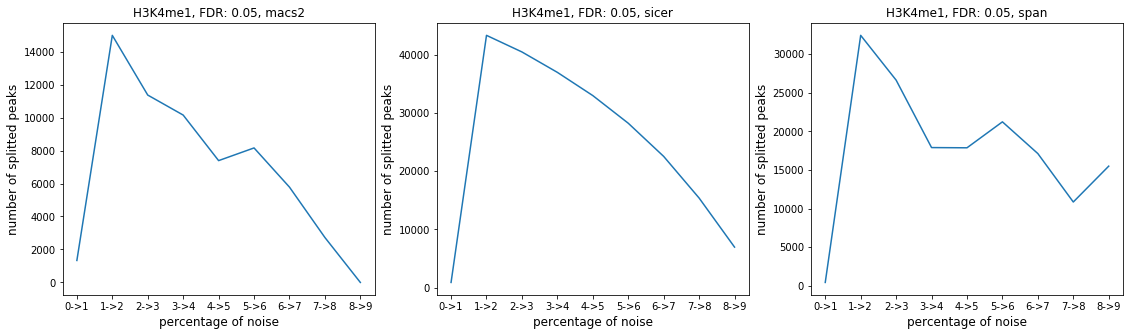

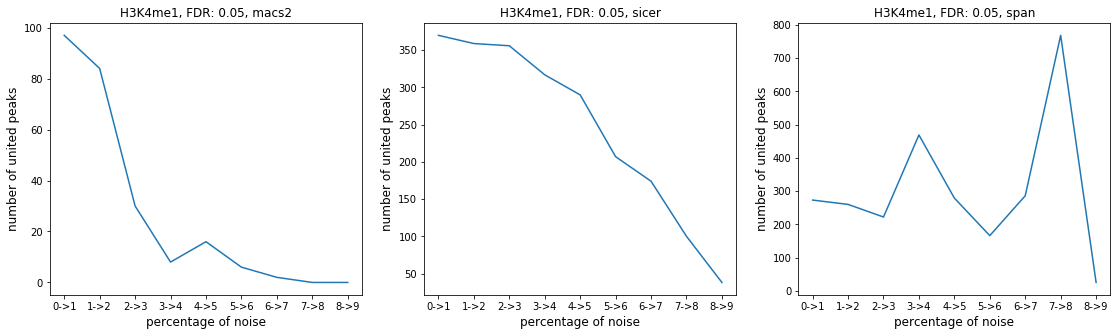

In [34]:
plt.figure(figsize=(19,5))
for i, spl, pk in zip(range(1, 4), (splk4me1, sic_splk4me1, sp_splk4me1),
                         ('macs2', 'sicer', 'span')):
    plt.subplot(130 + i)
    plt.plot(range(9), spl)
    plt.title('H3K4me1, FDR: 0.05, '+pk)
    plt.ylabel('number of splitted peaks', fontsize=12)
    plt.xlabel('percentage of noise', fontsize=12)
    plt.xticks(range(9), ['0->1', '1->2', '2->3', '3->4', '4->5', '5->6', '6->7', '7->8', '8->9'])
plt.show()

plt.figure(figsize=(19,5))
for i, un, pk in zip(range(1, 4), (unk4me1, sic_unk4me1, sp_unk4me1),
                         ('macs2', 'sicer', 'span')):
    plt.subplot(130 + i)
    plt.plot(range(9), un)
    plt.title('H3K4me1, FDR: 0.05, '+pk)
    plt.ylabel('number of united peaks', fontsize=12)
    plt.xlabel('percentage of noise', fontsize=12)
    plt.xticks(range(9), ['0->1', '1->2', '2->3', '3->4', '4->5', '5->6', '6->7', '7->8', '8->9'])
plt.show()

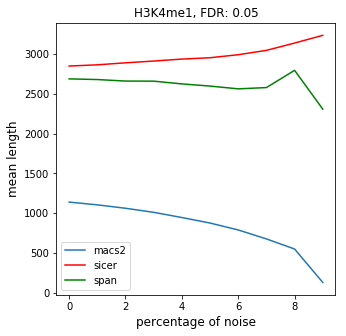

In [35]:
plt.figure(figsize=(5,5))
plt.plot(range(10), meansk4me1)
plt.plot(range(10), sic_meansk4me1, c='r')
plt.plot(range(10), sp_meansk4me1, c='g')
plt.legend(['macs2', 'sicer', 'span'])
plt.title('H3K4me1, FDR: 0.05')
plt.ylabel('mean length', fontsize=12)
plt.xlabel('percentage of noise', fontsize=12)
plt.show()

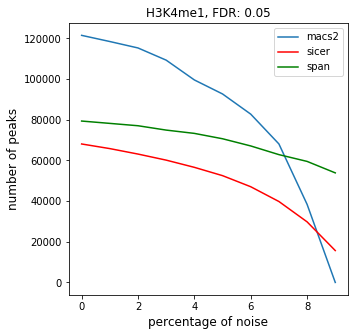

In [37]:
plt.figure(figsize=(5,5))
plt.plot(range(10), nsk4me1)
plt.plot(range(10), sic_nsk4me1, c='r')
plt.plot(range(10), sp_nsk4me1, c='g')
plt.legend(['macs2', 'sicer', 'span'])
plt.title('H3K4me1, FDR: 0.05')
plt.ylabel('number of peaks', fontsize=12)
plt.xlabel('percentage of noise', fontsize=12)
plt.show()